***
# HIGH ORDER UPWIND BIASED SCHEMES
***

## SECOND ORDER UPWIND
***

* In contrast to the first order upwind scheme, which takes the cell face value of $\phi$ to be the value at the node upstream, the second order upwind scheme uses a linear profile that is biased upwind to extrapolate to the cell face value. 

* The profile is given below, where subscripts C and U stand for upwind and far upwind, respectively:

    \begin{equation}\phi = k_0 + k_1 x\end{equation}
    
    \begin{equation}\phi = \begin{cases}\phi_C \text{ at } x = x_C\\ \phi_U \text{ at } x=x_U\end{cases}\end{equation}
    
* The coefficients $k_0$ and $k_1$ are obtained by solving the following simultaneous equations:

    \begin{equation}\phi_C = k_0 + k_1 x_C\end{equation}
    
    \begin{equation}\phi_U = k_0 + k_1 x_U\end{equation}

* Solution of the above equations should produce:

    \begin{equation}\phi = \phi_C + \frac{\phi_C - \phi_U}{x_C - x_U}\left(x-x_C\right)\end{equation}

* For a uniform grid, the cell face values are given by:
    
    \begin{equation}\phi_f = \frac{3}{2}\phi_C - \frac{1}{2}\phi_U\end{equation}

* We adopt the following grid to help specify the cell face values in terms of upwind and far upwind nodal values. The value $\phi$ at different nodes may not be the same.
    
    ![image1](highorder1.svg)

* If the mass flux is positive at the east face, then the upwind (C) and far upwind (U) values are $\phi_P$ and $\phi_W$, respectively. On the other hand, if the mass flux is negative, the upwind and far upwind values are $\phi_E$ and $\phi_{EE}$. 

    \begin{equation}\phi_e = \begin{cases}\frac{3}{2}\phi_P - \frac{1}{2}\phi_W \text{ if } F_e > 0\\
    \frac{3}{2}\phi_E - \frac{1}{2}\phi_{EE} \text{ if } F_e < 0\end{cases}\end{equation}

* Similarly, the value of $\phi$ at the west cell face is given by:

    \begin{equation}\phi_w = \begin{cases}\frac{3}{2}\phi_W - \frac{1}{2}\phi_{WW} \text{ if } F_w > 0\\
    \frac{3}{2}\phi_P - \frac{1}{2}\phi_E \text{ if } F_w < 0\end{cases}\end{equation}

* Re-expressing the conditionals as single equations:

    \begin{equation}F_e\phi_e = \left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_W\right) \max \left(F_e,0\right) - \left(\frac{3}{2}\phi_E - \frac{1}{2}\phi_{EE}\right) \max \left(-Fe,0\right)\end{equation}

    \begin{equation}F_w \phi_w = \left(\frac{3}{2}\phi_W - \frac{1}{2}\phi_{WW}\right) \max \left(F_w,0\right) -  \left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_E\right) \max \left(-F_w,0\right)\end{equation}
    
* Plugging above expressions into the discretized advection-diffusion equation:

    \begin{equation}\left[\left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_W\right) \max \left(F_e,0\right) - \left(\frac{3}{2}\phi_E - \frac{1}{2}\phi_{EE}\right) \max \left(-Fe,0\right)\right] - \left[\left(\frac{3}{2}\phi_W - \frac{1}{2}\phi_{WW}\right) \max \left(F_w,0\right) -  \left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_E\right) \max \left(-F_w,0\right)\right] + \Gamma_w \left(\frac{\phi_P - \phi_W}{\delta x_w}\right) - \Gamma_e \left(\frac{\phi_E - \phi_P}{\delta x_e}\right) = 0\end{equation}

* For uniform grid ($\delta x_e = \delta x_w = \Delta x$) and constant diffusion coefficient ($\Gamma_e = \Gamma_w = \Gamma$):
    
    \begin{equation}\left[\left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_W\right) \max \left(F_e,0\right) - \left(\frac{3}{2}\phi_E - \frac{1}{2}\phi_{EE}\right) \max \left(-Fe,0\right)\right] - \left[\left(\frac{3}{2}\phi_W - \frac{1}{2}\phi_{WW}\right) \max \left(F_w,0\right) -  \left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_E\right) \max \left(-F_w,0\right)\right] + \frac{\Gamma}{\Delta x} \left[2\phi_P - \phi_W - \phi_E \right] = 0\end{equation}

* From continuity, $F_e = F_w$ and multiplying through by $\frac{\Delta x}{\Gamma}$:

    \begin{equation}\left[\left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_W\right) \max \left(Pe,0\right) - \left(\frac{3}{2}\phi_E - \frac{1}{2}\phi_{EE}\right) \max \left(-Pe,0\right)\right] - \left[\left(\frac{3}{2}\phi_W - \frac{1}{2}\phi_{WW}\right) \max \left(Pe,0\right) -  \left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_E\right) \max \left(-Pe,0\right)\right] + \left[2\phi_P - \phi_W - \phi_E\right] = 0\end{equation}

* Re-arranging:
    
    \begin{equation}\frac{1}{2}\max \left(Pe,0\right)\phi_{WW} - \left[1 + 2 \max \left(Pe,0\right)\right]\phi_W + \left[2 + \frac{3}{2} \max \left(Pe,0\right) + \frac{3}{2}\max \left(-Pe,0\right)\right]\phi_P - \left[1 + 2 \max \left(-Pe,0\right)\right]\phi_E + \frac{1}{2} \max \left(-Pe,0\right)\phi_{EE} = 0\end{equation}
    
* In a more compact form:

    \begin{equation}a_{WW}\phi_{WW} + a_W \phi_W + a_P\phi_P + a_E \phi_E + a_{EE}\phi_{EE} = 0\end{equation}
    
    \begin{equation}a_{WW} = \frac{1}{2}\max \left(Pe,0\right)\end{equation}
    
    \begin{equation}a_W = -\left[1 + 2 \max \left(Pe,0\right)\right]\end{equation}
    
    \begin{equation}a_P = \left[2 + \frac{3}{2} \max \left(Pe,0\right) + \frac{3}{2}\max \left(-Pe,0\right)\right]\end{equation}
    
    \begin{equation}a_E = -\left[1 + 2 \max \left(-Pe,0\right)\right]\end{equation}
    
    \begin{equation}a_{EE} = \frac{1}{2} \max \left(-Pe,0\right)\end{equation}

### STABILITY ANALYSIS
***

* We perform a stability analysis of the second order upwind scheme by considering the advection term only and how it changes with respect to $\phi_P$.

* If the advection term is moved to the right hand side:
    
    \begin{equation} \text{RHS}_{\text{advection}} = -\left[\left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_W\right) \max \left(F_e,0\right) - \left(\frac{3}{2}\phi_E - \frac{1}{2}\phi_{EE}\right) \max \left(-Fe,0\right)\right] + \left[\left(\frac{3}{2}\phi_W - \frac{1}{2}\phi_{WW}\right) \max \left(F_w,0\right) -  \left(\frac{3}{2}\phi_P - \frac{1}{2}\phi_E\right) \max \left(-F_w,0\right)\right]\end{equation}
    
* The partial derivative of $RHS_{advection}$ with respect to $\phi_P$ is:

    \begin{equation}\frac{\partial \left(RHS_{advection}\right)}{\partial \phi_P} = -\frac{3}{2}\left[\max \left(F_e,0\right) + \max\left(-F_w,0\right)\right]\end{equation}
    
* Stability requires the derivative of  $RHS_{advection}$ with respect to $\phi_P$ to be negative. If this is the case, an increase in $\phi_P$ should result in a decrease in the value of modelled terms and vice versa. This helps keep the solution error under control. Clearly, the above derivative is negative for constant values of $F_e$ and $F_w$, implying that the second order upwind scheme is stable under said conditions.

### COMPARISON TO ANALYTICAL SOLUTION
***

* Considering steady 1-D advection-diffusion problem whose boundary conditions and parameters are given below: 

    \begin{equation}\phi\left(x = 0\right)= \phi_0 = 1\end{equation}
    
    \begin{equation}\phi\left(x = L\right) = \phi_L =  0\end{equation}
    
    \begin{equation} L = 1\end{equation}
    
    \begin{equation}u = 0.4 \text{ m/s}\end{equation}
    
    \begin{equation}\rho = 1\end{equation}
    
    \begin{equation}\Gamma = 0.1\end{equation}
    
    ![image2](highorder2.svg)

* The domain is divided into 10 equal cells with boundary conditions located at the west and east edge of the first and the tenth cell, respectively.
    
    \begin{equation}\Delta x = \frac{L}{n_{cells}} = \frac{1}{10} = 0.1\end{equation}
    
    \begin{equation}Pe = \frac{\rho u \Delta x}{\Gamma} = \frac{1*0.4*0.1}{0.1} = 0.4\end{equation}
   
* The internal grid points (points 3 - 9) are given by:

    \begin{equation}a_{WW}\phi_{WW} + a_W \phi_W + a_P \phi_P + a_E \phi_E + a_{EE}\phi_{EE} = 0\end{equation}
    
    \begin{equation}0.2\phi_1 - 1.8\phi_2 + 2.6\phi_3 -\phi_4 = 0\end{equation}
    
    \begin{equation}0.2\phi_2 - 1.8\phi_3 + 2.6\phi_4 -\phi_5 = 0\end{equation}
    
    \begin{equation}0.2\phi_3 - 1.8\phi_4 + 2.6\phi_5 -\phi_6 = 0\end{equation}
    
    \begin{equation}0.2\phi_4 - 1.8\phi_5 + 2.6\phi_6 -\phi_7 = 0\end{equation}
    
    \begin{equation}0.2\phi_5 - 1.8\phi_6 + 2.6\phi_7 -\phi_8 = 0\end{equation}
    
    \begin{equation}0.2\phi_6 - 1.8\phi_7 + 2.6\phi_8 -\phi_9 = 0\end{equation}
    
    \begin{equation}0.2\phi_7 - 1.8\phi_8 + 2.6\phi_9 -\phi_{10} = 0\end{equation}
    
* Grid points 1, 2, and 10 are close to the boundaries and need to be treated differently. 

* For the first cell, we need to construct a mirror cell to the west to specify the advective flux at the east face of the first cell. The value of $\phi$ at the centre of the mirror cell is obtained by linear interpolation from the first grid point and the west boundary point.
   
    \begin{equation}\phi_{mirror} = 2\phi_0 - \phi_1\end{equation}
    
* The equation for first grid point is:

    \begin{equation}\phi_e = \frac{3}{2}\phi_1 - \frac{1}{2}\phi_{mirror} = 2\phi_1 - \phi_0\end{equation}
    
    \begin{equation}\phi_w = \phi_0\end{equation}
    
    \begin{equation}Pe \left(\phi_e - \phi_w\right) + \left[\left(\phi_1 - \phi_{mirror}\right) - \left(\phi_2 - \phi_1\right)\right] = 0\end{equation}
    
    \begin{equation}Pe \left(2\phi_1 - \phi_0 - \phi_0\right) + \left[\left(\phi_1 - 2\phi_0 + \phi_1\right) - \left(\phi_2 - \phi_1\right)\right] = 0\end{equation}
    
    \begin{equation}Pe \left(2\phi_1 - 2\phi_0\right) + \left[3\phi_1 - 2\phi_0 - \phi_2\right] = 0\end{equation}
    
    \begin{equation}\left[3 + 2Pe\right]\phi_1 - \phi_2 = \left[2 + 2Pe\right]\phi_0\end{equation}
    
    \begin{equation}3.8\phi_1 - \phi_2 = 2.8\end{equation}

* The equation for the second grid point is:

    \begin{equation}\phi_e = \frac{3}{2}\phi_2 - \frac{1}{2}\phi_1\end{equation}
    
    \begin{equation}\phi_w = 2\phi_1 - \phi_0\end{equation}
    
    \begin{equation}Pe\left[\frac{3}{2}\phi_2 - \frac{1}{2}\phi_1 - 2\phi_1 + \phi_0\right] +  \left[\left(\phi_2 - \phi_1\right) - \left(\phi_3 - \phi_2\right)\right] = 0\end{equation}
    
    \begin{equation} Pe \left[1.5\phi_2 - 2.5\phi_1 + \phi_0\right] + 2\phi_2 -\phi_1 - \phi_3 = 0\end{equation}
    
    \begin{equation}-\left[1 + 2.5Pe\right]\phi_1 + \left[2 + 1.5Pe\right]\phi_2 - \phi_3 = -Pe \phi_0\end{equation}
    
    \begin{equation}-2\phi_1 + 2.6\phi_2 - \phi_3 = -0.4\end{equation}
    
* The equation for the tenth grid point is:

    \begin{equation}\phi_e = 0\end{equation}
    
    \begin{equation}\phi_w = 1.5\phi_9 - 0.5\phi_8\end{equation}
    
    \begin{equation}Pe\left[0.5\phi_8 - 1.5\phi_9\right] + \left[\left(\phi_{10} - \phi_9\right) - 2\left(\phi_L - \phi_{10}\right)\right] = 0\end{equation}
    
    \begin{equation}Pe\left[0.5\phi_8 - 1.5\phi_9\right] + \left[3\phi_{10} - \phi_4\right]\end{equation}
    
    \begin{equation}0.5Pe\phi_8 - \left[1 + 1.5Pe\right]\phi_9 + 3\phi_{10} = 0\end{equation}
    
    \begin{equation}0.2 \phi_8 - 1.6\phi_9 + 3\phi_{10} = 0\end{equation}
    
* Combining all 10 equations:

    \begin{equation}\begin{bmatrix} 3.8 && -1 && 0 && 0 && 0 && 0 && 0 && 0 && 0 && 0 \\ -2 && 2.6 && -1 && 0 && 0 && 0 && 0 && 0 && 0 && 0\\ 0.2 && -1.8 && 2.6 && -1 && 0 && 0 && 0 && 0 && 0 && 0\\ 0 && 0.2 && -1.8 && 2.6 && -1 && 0 && 0 && 0 && 0 && 0\\ 0 && 0 && 0.2 && -1.8 && 2.6 && -1 && 0 && 0 && 0 && 0\\ 0 && 0 && 0 && 0.2 && -1.8 && 2.6 && -1 && 0 && 0 && 0\\ 0 && 0 && 0 && 0 && 0.2 && -1.8 && 2.6 && -1 && 0 && 0\\  0 && 0 && 0 && 0 && 0 && 0.2 && -1.8 && 2.6 && -1 && 0\\ 0 && 0 && 0 && 0 && 0 && 0 && 0.2 && -1.8 && 2.6 && -1\\ 0 && 0 && 0 && 0 && 0 && 0 && 0 && 0.2 && -1.6 && 3\end{bmatrix} \begin{bmatrix}\phi_1 \\ \phi_2 \\ \phi_3 \\ \phi_4 \\ \phi_5 \\ \phi_6 \\ \phi_7 \\ \phi_8 \\ \phi_9 \\ \phi_{10}\end{bmatrix} = \begin{bmatrix}2.8 \\ -0.4 \\ 0 \\ 0 \\ 0\\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{bmatrix}\end{equation}
    
* The analytical solution is given by:
    
    \begin{equation}\frac{\phi - \phi_0}{\phi_L - \phi_0} = \frac{exp\left[\frac{\rho u}{\Gamma}\left(x - x_0\right)\right] - 1}{exp\left[\frac{\rho u}{\Gamma} \left(x_L - x_0\right)\right] - 1}\end{equation}
    
    \begin{equation}\phi\left(x\right) = \phi_0 + \left(\phi_L - \phi_0\right) \frac{exp\left[\frac{\rho u}{\Gamma} x\right] - 1}{exp\left[\frac{\rho u}{\Gamma}\right] - 1}\end{equation}
    
    \begin{equation}\phi\left(x\right) = 1 - \frac{exp\left[4 x\right] - 1}{exp\left[4\right] - 1}\end{equation}

In [1]:
from numpy import array, linspace, linalg, insert, exp
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['legend.frameon']=False
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['font.size'] = 14

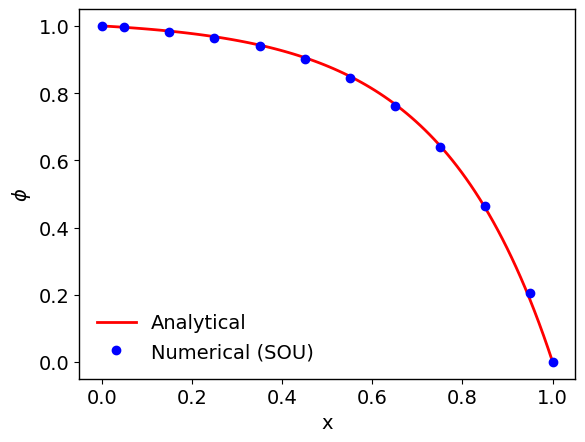

In [2]:
# coefficient matrix
A = array([[3.8, -1, 0, 0, 0, 0, 0, 0, 0, 0],
           [-2, 2.6, -1, 0, 0, 0, 0, 0, 0, 0],
           [0.2, -1.8, 2.6, -1, 0, 0, 0 , 0, 0, 0],
           [0, 0.2, -1.8, 2.6, -1, 0, 0, 0 , 0, 0],
           [0, 0, 0.2, -1.8, 2.6, -1, 0, 0, 0 , 0],
           [0, 0, 0, 0.2, -1.8, 2.6, -1, 0, 0, 0],
           [0, 0, 0, 0, 0.2, -1.8, 2.6, -1, 0, 0],
           [0, 0, 0, 0, 0, 0.2, -1.8, 2.6, -1, 0],
           [0, 0, 0, 0, 0, 0, 0.2, -1.8, 2.6, -1],
           [0, 0, 0, 0, 0, 0, 0, 0.2, -1.6, 3]])

# vector of knowns
b = array([2.8, -0.4, 0, 0, 0, 0, 0, 0, 0, 0])

# It may not be possible to use tridiagonal matrix algorithm 
# due to appearance of non-immediate neighbour coefficient (EE & WW)

# We solve the problem directly by matrix inversion
phi = linalg.solve(A, b)

# add boundary conditions to the solution
phi = insert(phi, 0, 1.0)
phi = insert(phi, 11, 0.0)

# grid points positions for the numerical solution
x = array([0, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.0])

# analytical solution
x_analytical = linspace(0,1,100)
phi_analytical = 1.0 - (exp(4.0*x_analytical) - 1.0)/(exp(4.0) - 1.0)

# compare numerical solution to analytical solution
plt.plot(x_analytical, phi_analytical, 'r-', label=r'Analytical')
plt.plot(x, phi, 'bo', label=r'Numerical (SOU)')
plt.xlabel('x')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()

## FROMM
***

* Unlike the second order upwind scheme, which assumes a linear profile between the two nodes upstream of the cell face, FROMM assumes a linear profile between the far upwind and downwind nodes straddling the cell face of interest. This essentially means FROMM is an interpolation scheme whereas second order upwind is an extrapolation scheme.

* The profile is given by:
    
    \begin{equation}\phi\left(x\right) = k_0 + k_1 \left(x - x_C\right)\end{equation}
    
* The unknowns $k_0$ and $k_1$ can be obtained by solving the following simultaneous equations:

    \begin{equation}\phi_D = k_0 + k_1 \left(x_D - x_C\right)\end{equation}
    
    \begin{equation}\phi_U = k_0 + k_1 \left(x_U - x_C\right)\end{equation}
    
* This should result in the following equation:
    
    \begin{equation}\phi\left(x\right) = \phi_U + \frac{\phi_D - \phi_U}{x_D - x_U} \left(x-x_U\right)\end{equation}

* The cell face value of $\phi$ is given by:

    \begin{equation}\phi_f = \phi_U + \frac{\phi_D - \phi_U}{x_D - x_U} \left(x_f-x_U\right)\end{equation}

* The cell face value can also be expressed in terms of central node value by assuming the same slope between the central node and the cell face:

    \begin{equation}\phi_f = \phi_C + \frac{x_f - x_C}{x_D - x_U} \left(\phi_D - \phi_U\right)\end{equation}
    
* For a uniform grid, this simplifies to:

    \begin{equation}\phi_f = \phi_C + \frac{1}{4}\phi_D - \frac{1}{4} \phi_U\end{equation}
    
    \begin{equation}\phi_e = \begin{cases}\phi_P + \frac{1}{4}\phi_E - \frac{1}{4}\phi_W \text{ if } F_e > 0\\ \phi_E + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{EE} \text{ if } F_e < 0 \end{cases}\end{equation}
    
    \begin{equation}\phi_w = \begin{cases}\phi_W + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{WW} \text{ if } F_w > 0 \\ \phi_P + \frac{1}{4}\phi_W - \frac{1}{4}\phi_E \text{ if } F_w < 0\end{cases}\end{equation}
    
* Re-expressing the conditionals as single equations:

    \begin{equation}F_e\phi_e = \left( \phi_P + \frac{1}{4}\phi_E - \frac{1}{4}\phi_W\right)\max\left(F_e, 0\right) - \left( \phi_E + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{EE}\right)\max\left(-F_e,0\right)\end{equation}
    
    \begin{equation}F_w \phi_w = \left(\phi_W + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{WW} \right) \max\left(F_w,0\right) - \left( \phi_P + \frac{1}{4}\phi_W - \frac{1}{4}\phi_E\right) \max \left(-F_w,0\right)\end{equation}
    
* Plugging above equations into the discretized advection-diffusion equation:

    \begin{equation}\left[ \left( \phi_P + \frac{1}{4}\phi_E - \frac{1}{4}\phi_W\right)\max\left(F_e, 0\right) - \left( \phi_E + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{EE}\right)\max\left(-F_e,0\right)\right] - \left[\left(\phi_W + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{WW} \right) \max\left(F_w,0\right) - \left( \phi_P + \frac{1}{4}\phi_W - \frac{1}{4}\phi_E\right) \max \left(-F_w,0\right) \right] + \Gamma_w \left(\frac{\phi_P - \phi_W}{\delta x_w}\right) - \Gamma_e \left(\frac{\phi_E - \phi_P}{\delta x_e}\right) = 0\end{equation}

* For uniform grid and constant diffusion coefficient:

    \begin{equation}\left[\left(\phi_P + \frac{1}{4}\phi_E - \frac{1}{4}\phi_W\right)\max\left(Pe, 0\right) - \left( \phi_E + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{EE}\right)\max\left(-Pe,0\right)\right] - \left[\left(\phi_W + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{WW} \right) \max\left(Pe,0\right) - \left( \phi_P + \frac{1}{4}\phi_W - \frac{1}{4}\phi_E\right) \max \left(-Pe,0\right) \right] + \left[2\phi_P - \phi_W - \phi_E\right] = 0\end{equation}

* Re-arranging:
    
    \begin{equation}0.25\max\left(Pe,0\right)\phi_{WW} - \left[1 + 1.25\max\left(Pe,0\right) - 0.25\max\left(-Pe,0\right)\right]\phi_W + \left[2 + 0.75\max\left(Pe,0\right) - 0.75\max\left(-Pe,0\right)\right]\phi_P - \left[1 - 0.25\max\left(Pe,0\right) + 1.25\max\left(-Pe,0\right)\right]\phi_E + 0.25\max\left(-Pe,0\right)\phi_{EE}=0\end{equation}

* Casting into the general form:
    
    \begin{equation}a_{WW}\phi_{WW} + a_W \phi_W + a_P\phi_P + a_E \phi_E +  a_{EE}\phi_{EE}  = 0\end{equation}
    
    \begin{equation}a_{WW} = 0.25\max\left(Pe,0\right)\end{equation}
    
    \begin{equation}a_W = -\left[1 + 1.25\max\left(Pe,0\right) - 0.25\max\left(-Pe,0\right)\right]\end{equation}
    
    \begin{equation}a_P = \left[2 + 0.75\max\left(Pe,0\right) - 0.75\max\left(-Pe,0\right)\right]\end{equation}
    
    \begin{equation}a_E = - \left[1 - 0.25\max\left(Pe,0\right) + 1.25\max\left(-Pe,0\right)\right]\end{equation}
    
    \begin{equation}a_{EE} = 0.25\max\left(-Pe,0\right)\end{equation}

### STABILITY ANALYSIS
***

* The right hand side is given by:

    \begin{equation}\text{RHS}_{\text{advection}} = -\left[ \left( \phi_P + \frac{1}{4}\phi_E - \frac{1}{4}\phi_W\right)\max\left(F_e, 0\right) - \left( \phi_E + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{EE}\right)\max\left(-F_e,0\right)\right] + \left[\left(\phi_W + \frac{1}{4}\phi_P - \frac{1}{4}\phi_{WW} \right) \max\left(F_w,0\right) - \left( \phi_P + \frac{1}{4}\phi_W - \frac{1}{4}\phi_E\right) \max \left(-F_w,0\right) \right]\end{equation}
    
* The derivative of right hand side with respect to $\phi_P$ is:

    \begin{equation}\frac{\partial \left(RHS_{advection}\right)}{\partial \phi_P} = -\max\left(F_e,0\right) + \frac{1}{4}\max\left(-F_e,0\right) + \frac{1}{4}\max \left(F_w,0\right) - \max \left(-F_w,0\right)\end{equation}
    
* Given that the second and third term of the derivative are positive, FROMM is not always stable.

### COMPARISON TO ANALYTICAL SOLUTION
***

* For the same problem, we get the following using FROMM scheme:
   
   \begin{equation}\begin{bmatrix} 3.5 && -0.9 && 0 && 0 && 0 && 0 && 0 && 0 && 0 && 0 \\ -1.6 && 2.3 && -0.9 && 0 && 0 && 0 && 0 && 0 && 0 && 0\\ 0.1 && -1.5 && 2.3 && -0.9 && 0 && 0 && 0 && 0 && 0 && 0\\ 0 && 0.1 && -1.5 && 2.3 && -0.9 && 0 && 0 && 0 && 0 && 0\\ 0 && 0 && 0.1 && -1.5 && 2.3 && -0.9 && 0 && 0 && 0 && 0\\ 0 && 0 && 0 && 0.1 && -1.5 && 2.3 && -0.9 && 0 && 0 && 0\\ 0 && 0 && 0 && 0 && 0.1 && -1.5 && 2.3 && -0.9 && 0 && 0\\  0 && 0 && 0 && 0 && 0 && 0.1 && -1.5 && 2.3 && -0.9 && 0\\ 0 && 0 && 0 && 0 && 0 && 0 && 0.1 && -1.5 && 2.3 && -0.9\\ 0 && 0 && 0 && 0 && 0 && 0 && 0 && 0.1 && -1.4 && 2.9\end{bmatrix} \begin{bmatrix}\phi_1 \\ \phi_2 \\ \phi_3 \\ \phi_4 \\ \phi_5 \\ \phi_6 \\ \phi_7 \\ \phi_8 \\ \phi_9 \\ \phi_{10}\end{bmatrix} = \begin{bmatrix}2.6 \\ -0.2 \\ 0 \\ 0 \\ 0\\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{bmatrix}\end{equation}

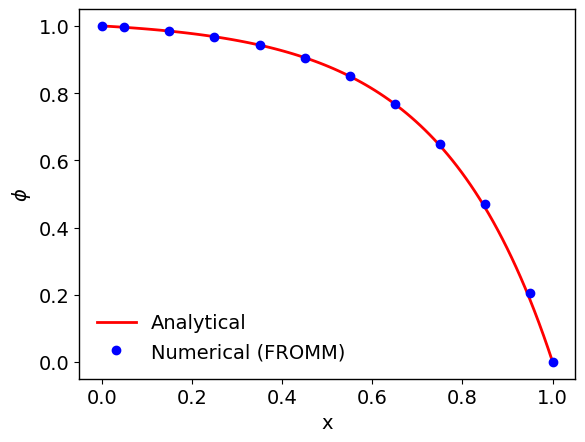

In [3]:
A = array([[3.5, -0.9, 0, 0, 0, 0, 0, 0, 0, 0],
           [-1.6, 2.3, -0.9, 0, 0, 0, 0, 0, 0, 0],
           [0.1, -1.5, 2.3, -0.9, 0, 0, 0 , 0, 0, 0],
           [0, 0.1, -1.5, 2.3, -0.9, 0, 0, 0 , 0, 0],
           [0, 0, 0.1, -1.5, 2.3, -0.9, 0, 0, 0 , 0],
           [0, 0, 0, 0.1, -1.5, 2.3, -0.9, 0, 0, 0],
           [0, 0, 0, 0, 0.1, -1.5, 2.3, -0.9, 0, 0],
           [0, 0, 0, 0, 0, 0.1, -1.5, 2.3, -0.9, 0],
           [0, 0, 0, 0, 0, 0, 0.1, -1.5, 2.3, -0.9],
           [0, 0, 0, 0, 0, 0, 0, 0.1, -1.4, 2.9]])

b = array([2.6, -0.2, 0, 0, 0, 0, 0, 0, 0, 0])

phi = linalg.solve(A, b)

phi = insert(phi, 0, 1.0)
phi = insert(phi, 11, 0.0)

plt.plot(x_analytical, phi_analytical, 'r-', label=r'Analytical')
plt.plot(x, phi, 'bo', label=r'Numerical (FROMM)')
plt.xlabel('x')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()

## QUADRATIC UPSTREAM INTERPOLATION FOR CONVECTIVE KINETICS (QUICK)
***

* This scheme uses a quadratic polynomial profile that is biased upwind to interpolate the cell face values of $\phi$. 

* For 1-D problems, the profile is given below, where U, C, and D stand for upwind, centre and downwind, respectively:
    
    \begin{equation}\phi = k_0 + k_1 x + k_2 x^2\end{equation}
    
    \begin{equation}\phi = \begin{cases}\phi_U \text{ at } x = x_U\\ \phi_C \text{ at } x = x_C \\ \phi_D \text{ at } x=x_D\end{cases}\end{equation}

* The values of $\phi$ at upwind, central and downwind node are given by:

    \begin{equation}\phi_U = k_0 + k_1 x_U + k_2 x_U^2\end{equation}
    
    \begin{equation}\phi_C = k_0 + k_1 x_C + k_2 x_C^2\end{equation}
    
    \begin{equation}\phi_D = k_0 + k_1 x_D + k_2 x_D^2\end{equation}
    
* The above three equations should be solved simultaneously for the coefficients $k_0$, $k_1$, and $k_2$. One way to do so would be to first eliminate $k_0$ by independently subtracting the second and third equation from the first equation to form two intermediate equations with two unknowns $k_1$ and $k_2$. The intermediate equations can then be solved for $k_1$ and $k_2$, after which $k_0$ is obtained by back substitution. This should result in the following:

    \begin{equation}\phi\left(x\right) = \phi_U + \frac{\left(x-x_U\right)\left(x-x_C\right)}{\left(
    x_D - x_U\right)\left(x_D - x_C\right)} \left(\phi_D - \phi_U\right) + \frac{\left(x-x_U\right)\left(x-x_D\right)}{\left(x_C - x_U\right)\left(x_C - x_D\right)}\left(\phi_C - \phi_U\right)\end{equation}
    
* For a uniform grid, the cell face values are given by:

    \begin{equation}\phi_f = \frac{3}{4}\phi_C + \frac{3}{8} \phi_D - \frac{1}{8}\phi_U\end{equation}
    
    \begin{equation}\phi_e = \begin{cases}\frac{3}{4}\phi_P + \frac{3}{8}\phi_E - \frac{1}{8}\phi_W \text{ if } F_e > 0\\ \frac{3}{4}\phi_E + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{EE} \text{ if } F_e < 0\end{cases}\end{equation}
    
    \begin{equation}\phi_w = \begin{cases} \frac{3}{4} \phi_W + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{WW} \text{ if } F_w > 0 \\ \frac{3}{4}\phi_P + \frac{3}{8}\phi_W - \frac{1}{8}\phi_E \text{ if } F_w < 0\end{cases}\end{equation}
    
* Re-expressing above conditionals as single equations:

    \begin{equation}F_e\phi_e = \left(\frac{3}{4}\phi_P + \frac{3}{8}\phi_E - \frac{1}{8}\phi_W\right)\max\left(F_e,0\right) - \left(\frac{3}{4}\phi_E + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{EE}\right)\max\left(-F_e,0\right)\end{equation}
    
    \begin{equation}F_w\phi_w=\left(\frac{3}{4} \phi_W + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{WW}\right)\max\left(F_w,0\right) - \left(\frac{3}{4}\phi_P + \frac{3}{8}\phi_W - \frac{1}{8}\phi_E\right)\max\left(-F_w,0\right)\end{equation}

* Plugging the above equations into the discretized advection-diffusion equation:

    \begin{equation}\left[ \left(\frac{3}{4}\phi_P + \frac{3}{8}\phi_E - \frac{1}{8}\phi_W\right)\max\left(F_e,0\right) - \left(\frac{3}{4}\phi_E + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{EE}\right)\max\left(-F_e,0\right)\right] - \left[ \left(\frac{3}{4} \phi_W + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{WW}\right)\max\left(F_w,0\right) - \left(\frac{3}{4}\phi_P + \frac{3}{8}\phi_W - \frac{1}{8}\phi_E\right)\max\left(-F_w,0\right)\right] + \Gamma_w \left(\frac{\phi_P - \phi_W}{\delta x_w}\right) - \Gamma_e \left(\frac{\phi_E - \phi_P}{\delta x_e}\right) = 0\end{equation}

* For uniform grid and constant diffusion coefficient:

    \begin{equation}\left[ \left(\frac{3}{4}\phi_P + \frac{3}{8}\phi_E - \frac{1}{8}\phi_W\right)\max\left(Pe,0\right) - \left(\frac{3}{4}\phi_E + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{EE}\right)\max\left(-Pe,0\right)\right] - \left[ \left(\frac{3}{4} \phi_W + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{WW}\right)\max\left(Pe,0\right) - \left(\frac{3}{4}\phi_P + \frac{3}{8}\phi_W - \frac{1}{8}\phi_E\right)\max\left(-Pe,0\right)\right] + \left[2\phi_P - \phi_W - \phi_E\right] = 0\end{equation}
    
* In more compact form:
    
    \begin{equation}a_{WW}\phi_{WW} + a_W \phi_W + a_P \phi_P + a_E \phi_E +  + a_{EE} \phi_{EE} = 0\end{equation}
    
    \begin{equation}a_{WW} = \frac{1}{8}\max \left(Pe,0\right)\end{equation}
    
    \begin{equation}a_W = -\left[1 + \frac{7}{8}\max\left(Pe,0\right) - \frac{3}{8}\max\left(-Pe,0\right)\right]\end{equation}
     
    \begin{equation}a_P = \left[2 + \frac{3}{8}\max\left(Pe,0\right) + \frac{3}{8}\max\left(-Pe,0\right)\right]\end{equation}
    
    \begin{equation}a_E = -\left[1 - \frac{3}{8}\max\left(Pe,0\right) + \frac{1}{8}\max\left(-Pe,0\right)\right]\end{equation}
    
    \begin{equation}a_{EE} = \frac{1}{8}\max\left(-Pe,0\right)\end{equation}
    
### STABILITY ANALYSIS
***

* The right hand side of the advective term is given by:

    \begin{equation}\text{RHS}_{\text{advection}} = -\left[ \left(\frac{3}{4}\phi_P + \frac{3}{8}\phi_E - \frac{1}{8}\phi_W\right)\max\left(F_e,0\right) - \left(\frac{3}{4}\phi_E + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{EE}\right)\max\left(-F_e,0\right)\right] + \left[ \left(\frac{3}{4} \phi_W + \frac{3}{8}\phi_P - \frac{1}{8}\phi_{WW}\right)\max\left(F_w,0\right) - \left(\frac{3}{4}\phi_P + \frac{3}{8}\phi_W - \frac{1}{8}\phi_E\right)\max\left(-F_w,0\right)\right]\end{equation}
    
* The derivative of right hand side with respect to $\phi_P$ is:

    \begin{equation}\frac{\partial \left(RHS_{advection}\right)}{\partial \phi_P} = -\frac{3}{4}\max\left(F_e,0\right) + \frac{3}{8} \max\left(-F_e,0\right) + \frac{3}{8}\max\left(F_w,0\right) - \frac{3}{4}\max\left(-F_w,0\right)\end{equation}
    
* The first and fourth terms are negative. However, the second and third terms are positive, which can render the QUICK scheme unstable under certain conditions. If $F_e$ and $F_w$ are not constant, this could further complicate things. To ensure the QUICK scheme is always stable, different researchers proposed different tricks to remedy the troublesome positive terms from the derivative above. One of these tricks involve grouping the troublesome positive terms with the source term.

### COMPARISON TO ANALYTICAL SOLUTION
***

* Considering the same 1-D case shown above, a QUICK scheme gives the following:
    
    \begin{equation}\begin{bmatrix} 3.35 && -0.85 && 0 && 0 && 0 && 0 && 0 && 0 && 0 && 0 \\ -1.4 && 2.15 && -0.85 && 0 && 0 && 0 && 0 && 0 && 0 && 0\\ 0.05 && -1.35 && 2.15 && -0.85 && 0 && 0 && 0 && 0 && 0 && 0\\ 0 && 0.05 && -1.35 && 2.15 && -0.85 && 0 && 0 && 0 && 0 && 0\\ 0 && 0 && 0.05 && -1.35 && 2.15 && -0.85 && 0 && 0 && 0 && 0\\ 0 && 0 && 0 && 0.05 && -1.35 && 2.15 && -0.85 && 0 && 0 && 0\\ 0 && 0 && 0 && 0 && 0.05 && -1.35 && 2.15 && -0.85 && 0 && 0\\  0 && 0 && 0 && 0 && 0 && 0.05 && -1.35 && 2.15 && -0.85 && 0\\ 0 && 0 && 0 && 0 && 0 && 0 && 0.05 && -1.35 && 2.15 && -0.85\\ 0 && 0 && 0 && 0 && 0 && 0 && 0 && 0.05 && -1.3 && 2.85\end{bmatrix} \begin{bmatrix}\phi_1 \\ \phi_2 \\ \phi_3 \\ \phi_4 \\ \phi_5 \\ \phi_6 \\ \phi_7 \\ \phi_8 \\ \phi_9 \\ \phi_{10}\end{bmatrix} = \begin{bmatrix}2.5 \\ -0.1 \\ 0 \\ 0 \\ 0\\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{bmatrix}\end{equation}

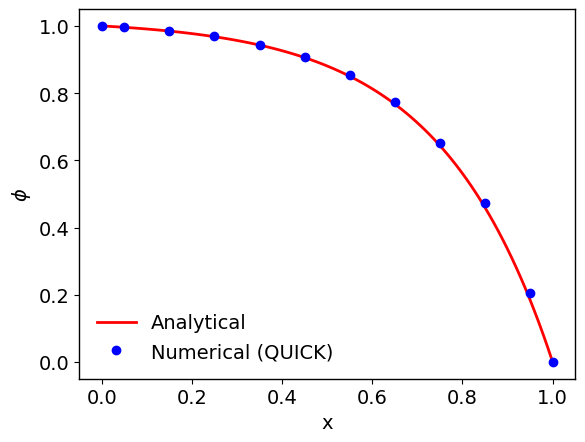

In [4]:
A = array([[3.35, -0.85, 0, 0, 0, 0, 0, 0, 0, 0],
           [-1.4, 2.15, -0.85, 0, 0, 0, 0, 0, 0, 0],
           [0.05, -1.35, 2.15, -0.85, 0, 0, 0 , 0, 0, 0],
           [0, 0.05, -1.35, 2.15, -0.85, 0, 0, 0 , 0, 0],
           [0, 0, 0.05, -1.35, 2.15, -0.85, 0, 0, 0 , 0],
           [0, 0, 0, 0.05, -1.35, 2.15, -0.85, 0, 0, 0],
           [0, 0, 0, 0, 0.05, -1.35, 2.15, -0.85, 0, 0],
           [0, 0, 0, 0, 0, 0.05, -1.35, 2.15, -0.85, 0],
           [0, 0, 0, 0, 0, 0, 0.05, -1.35, 2.15, -0.85],
           [0, 0, 0, 0, 0, 0, 0, 0.05, -1.3, 2.85]])

b = array([2.5, -0.1, 0, 0, 0, 0, 0, 0, 0, 0])

phi = linalg.solve(A, b)

phi = insert(phi, 0, 1.0)
phi = insert(phi, 11, 0.0)

plt.plot(x_analytical, phi_analytical, 'r-', label=r'Analytical')
plt.plot(x, phi, 'bo', label=r'Numerical (QUICK)')
plt.xlabel('x')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()